# Image Classification Using Keras Sequential API

## Loading Dataset

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

## Scaling down the pixels to between 0 - 1

In [5]:
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
"Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Ankle boot'

## Building the Neural Network

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6824 - loss: 0.9906 - val_accuracy: 0.8296 - val_loss: 0.5071
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8252 - loss: 0.5066 - val_accuracy: 0.8386 - val_loss: 0.4558
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8428 - loss: 0.4521 - val_accuracy: 0.8452 - val_loss: 0.4309
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8528 - loss: 0.4221 - val_accuracy: 0.8494 - val_loss: 0.4160
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8595 - loss: 0.4011 - val_accuracy: 0.8546 - val_loss: 0.4035
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8654 - loss: 0.3844 - val_accuracy: 0.8588 - val_loss: 0.3952
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8703 - loss: 0.3704 - val_accuracy: 0.8618 - val_loss: 0.3891
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8742 - loss: 0.3579 - 

## Plotting the learning curves.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

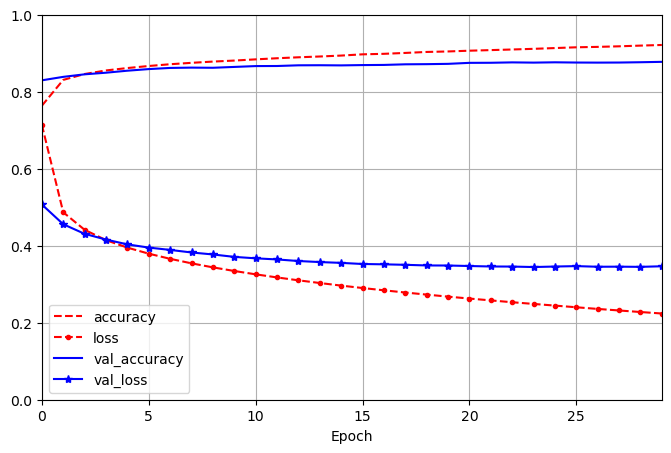

In [17]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)

plt.show()
                                                                                 

## Evaluating the Model.

In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.3676


[0.362579345703125, 0.8759999871253967]

## Visualization Using TensorBoard

In [23]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [20]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

C:\Users\arnol\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6797 - loss: 1.0056 - val_accuracy: 0.8296 - val_loss: 0.5017
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8269 - loss: 0.5060 - val_accuracy: 0.8424 - val_loss: 0.4508
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8423 - loss: 0.4532 - val_accuracy: 0.8484 - val_loss: 0.4287
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8532 - loss: 0.4231 - val_accuracy: 0.8496 - val_loss: 0.4134
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8608 - loss: 0.4014 - val_accuracy: 0.8518 - val_loss: 0.4020
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8660 - loss: 0.3840 - val_accuracy: 0.8576 - val_loss: 0.3947
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8694 - loss: 0.3697 - val_accuracy: 0.8588 - val_loss: 0.3874
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8738 - loss: 0.3574 -

In [25]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print(" " * (len(path.parts) - 1) + path.parts[-1])

my_logs
 run_2025_03_10_20_37_22
  plugins
   profile
    2025_03_10_17_37_31
     ARNOLDODUOR.xplane.pb
  train
   events.out.tfevents.1741628248.ARNOLDODUOR.11356.0.v2
  validation
   events.out.tfevents.1741628256.ARNOLDODUOR.11356.1.v2


In [26]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

# Fine Tuning the Neural Net Hyperparameters

In [27]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [28]:
import keras_tuner as kt

In [29]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in  range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [30]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True, directory="my_fashion_mnist", project_name="my_rnd_search", seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 51s]
val_accuracy: 0.7630000114440918

Best val_accuracy So Far: 0.8546000123023987
Total elapsed time: 00h 04m 20s


In [31]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

C:\Users\arnol\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [33]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [34]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.8546000123023987


In [35]:
best_trial.metrics.get_last_value("val_accuracy")

0.8546000123023987

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [38]:
history = best_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, callbacks=[tensorboard_cb, early_stopping])

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8534 - loss: 0.4410 - val_accuracy: 0.8474 - val_loss: 0.4796
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8558 - loss: 0.4318 - val_accuracy: 0.8400 - val_loss: 0.4843
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8512 - loss: 0.4308 - val_accuracy: 0.8396 - val_loss: 0.4638
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8583 - loss: 0.4092 - val_accuracy: 0.8388 - val_loss: 0.4895
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8489 - loss: 0.4458 - val_accuracy: 0.8426 - val_loss: 0.4714
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8573 - loss: 0.4281 - val_accuracy: 0.8236 - val_loss: 0.5670
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8329 - loss: 0.5065 - val_accuracy: 0.8428 - val_loss: 0.4475
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8622 - loss: 0.404

In [41]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8481 - loss: 0.4438


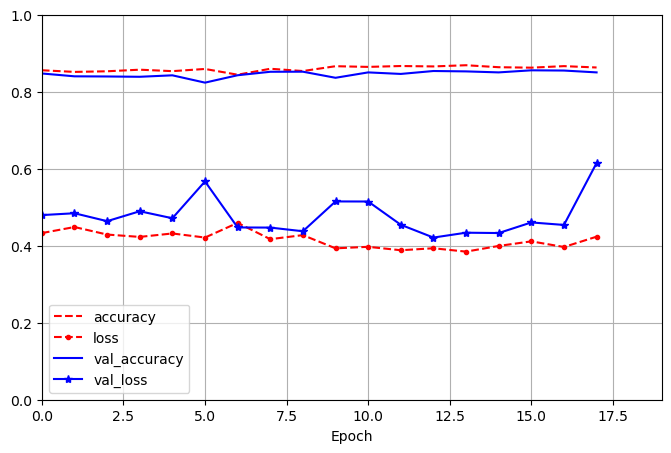

In [43]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)

plt.show()